In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

In [ ]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
print(arr.shape)
print(arr[0, 1])

In [ ]:
identity = np.eye(3, dtype=int)
print(identity)

In [ ]:
def PdfMultivariateGaussian(X, mu, cov):
    assert(X.shape == mu.shape)
    assert(cov.shape[0] == cov.shape[1])

    twoPi = 2 * np.pi
    n = X.shape[0]
    detCov = np.linalg.det(cov)
    const = 1/(np.sqrt(twoPi**n * detCov))
    powerTerm = -0.5 * np.dot(np.dot((X-mu).T, np.linalg.inv(cov)), (X-mu))
    return const * np.exp(powerTerm)

In [ ]:
X_train_pos = np.random.randn(20, 2) + np.array([[1., 2.]])
print(X_train_pos)

In [ ]:
mu_pos = np.mean(X_train_pos, axis=0)
print(mu_pos)

In [ ]:
for x in X_train_pos:
    print(x)

In [ ]:
cov = np.eye(X_train_pos.shape[1], dtype=int)
print(cov)

ProbX_train_pos = [PdfMultivariateGaussian(x, mu_pos, cov) for x in X_train_pos]
print(ProbX_train_pos)

In [ ]:
temp = X_train_pos[10]
print(temp)
print(temp.shape)
temp1 = np.array([[1.1, 0.2]])
print(temp1.shape)
temp2 = np.transpose(temp1)
print(temp2.shape)
c = np.matmul(temp2, temp1)
print(c)
a = np.array([1, 2, 3])
print(np.transpose(a).shape)

In [ ]:
# Cell type : CodeWrite

def phi_2(x, degree):
    # x is a 2D array of shape (N, 2)
    # need heterogeneous polynomial features of degree 'degree'
    x_new = []
    for i in range(x.shape[0]):
        x_temp = []
        for j in range(degree+1):
            for k in range(degree+1):
                if j+k <= degree:
                    x_temp.append(x[i, 0]**j * x[i, 1]**k)
        x_new.append(x_temp)   
    return x_new

def generateYValues(x):
    y = np.zeros(x.shape[0])
    a = [0.5, 0.5]
    b = [-0.5, -0.5]
    c = [0.5, -0.5]
    for i in range(x.shape[0]):
        term1 = np.exp(-4 * np.dot(x[i]-a, x[i]-a))
        term2 = np.exp(-4 * np.dot(x[i]-b, x[i]-b))
        term3 = np.exp(-4 * np.dot(x[i]-c, x[i]-c))
        y[i] = term1 + term2 + term3
    return y

def calculate_bias_variance(w_matrix, degree):
    w_mean = np.mean(w_matrix, axis=0)
    bias = 0
    variance = 0
    X, Y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
    X_matrix = np.zeros((X.shape[0]*X.shape[1], 2))
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            X_matrix[i*X.shape[0]+j, 0] = X[i, j]
            X_matrix[i*X.shape[0]+j, 1] = Y[i, j]
    
    Z_mean = polynomial_regression_ridge_pred(X_matrix, w_mean, degree)
    for i in range(X_matrix.shape[0]):
        bias += np.dot(Z_mean[i] - generateYValues(X_matrix[i]), Z_mean[i] - generateYValues(X_matrix[i]))
    
    for i in range(w_matrix.shape[0]):
        Z = polynomial_regression_ridge_pred(X_matrix, w_matrix[i], degree)
        for j in range(X_matrix.shape[0]):
            variance += np.dot(Z[j] - Z_mean[j], Z[j] - Z_mean[j])

    bias /= X_matrix.shape[0]
    bias = np.sqrt(bias)
    variance /= X_matrix.shape[0]
    variance /= w_matrix.shape[0]
    return bias, variance

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    X_test_poly = phi_2(X_test, degree)
    X_test_poly = np.array(X_test_poly)
    Y_test_pred = np.dot(X_test_poly, wt_vector)
    return Y_test_pred

    
def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))

    # Get Z using other functions
    X_matrix = np.zeros((X.shape[0]*X.shape[1], 2))
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            X_matrix[i*X.shape[0]+j, 0] = X[i, j]
            X_matrix[i*X.shape[0]+j, 1] = Y[i, j]
    
    Z = polynomial_regression_ridge_pred(X_matrix, wt_vector, degree)
    Z = Z.reshape(X.shape[0], X.shape[1])
    
    plt.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20))
    plt.title(title)
    plt.colorbar()
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Here you may assume d=2, for simplicity.
    
    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    X_train_poly = phi_2(X_train, degree)
    X_train_poly = np.array(X_train_poly)
    X_train_poly_transpose = np.transpose(X_train_poly)

    a = np.matmul(X_train_poly_transpose, X_train_poly)
    a += reg_param * np.eye(a.shape[0])
    b = np.matmul(X_train_poly_transpose, Y_train)
    w = np.matmul(np.linalg.inv(a), b)
    return w

def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """

    # phi_size is the size of the feature vector (n+d)C(d)
    phi_size = (degree+2)*(degree+1)/2
    w_matrix = []

    for i in range(100):
        X_train = np.random.uniform(-1, 1, (num_training_samples, 2))
        Y_train = generateYValues(X_train)
        w = polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param)
        Y_train_pred = polynomial_regression_ridge_pred(X_train, w, degree)
        w_matrix.append(w)

    w_matrix = np.array(w_matrix)
    w_mean = np.mean(w_matrix, axis=0)
    bias, variance = calculate_bias_variance(w_matrix, degree)

    plt.subplots(1, 4, figsize=(20, 5))
    for i in range(3):
        plt.subplot(1, 4, i+1)
        visualise_polynomial_2d(w_matrix[i], degree, title="f_S for training sample " + str(i+1))

    plt.subplot(1, 4, 4)
    visualise_polynomial_2d(w_mean, degree, title="Average f_S for degree " + str(degree) + " and lambda " + str(reg_param))

    mse = bias + variance
    return bias, variance, mse

bias_table = []
bias_table.append([" ", 1e-7, 1e-3])
variance_table = []
variance_table.append([" ", 1e-7, 1e-3])

for degree in [1,2]:
    bias_row = []
    bias_row.append(degree)
    variance_row = []
    variance_row.append(degree)
    for reg_param in [1e-7, 1e-5]:
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        bias_row.append(b)
        variance_row.append(v)
        
        print('================================')
        print('Degree = '+str(degree)+' lambda = '+str(reg_param))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))
        plt.show()
    bias_table.append(bias_row)
    variance_table.append(variance_row)

bias_table = np.array(bias_table, dtype=object)
variance_table = np.array(variance_table, dtype=object)

print('Bias Table')
print(bias_table)
print('Variance Table')
print(variance_table)

In [1]:
i = 0
while(1):
    i = i+1

KeyboardInterrupt: 

Dataset 1
Error 1a:  0.126
Error 1b:  0.1245
Error 1c:  0.1245


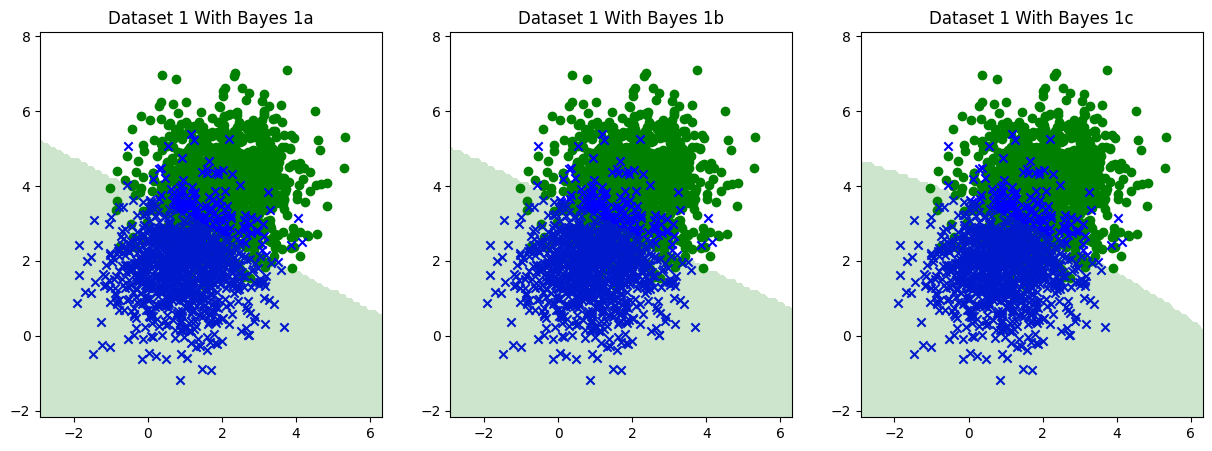

Dataset 2
Error 1a:  0.0085
Error 1b:  0.0
Error 1c:  0.0


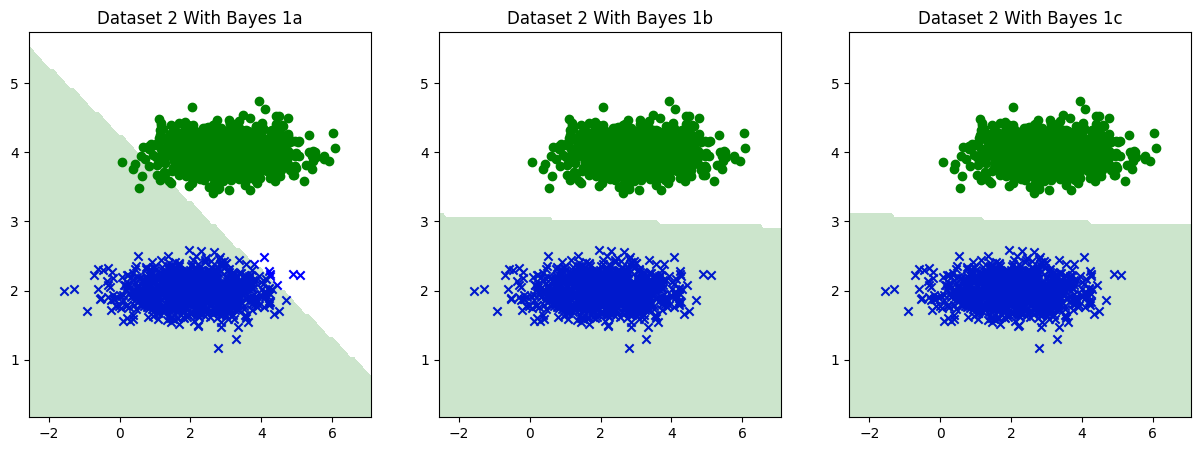

Dataset 3
Error 1a:  0.497
Error 1b:  0.495
Error 1c:  0.135


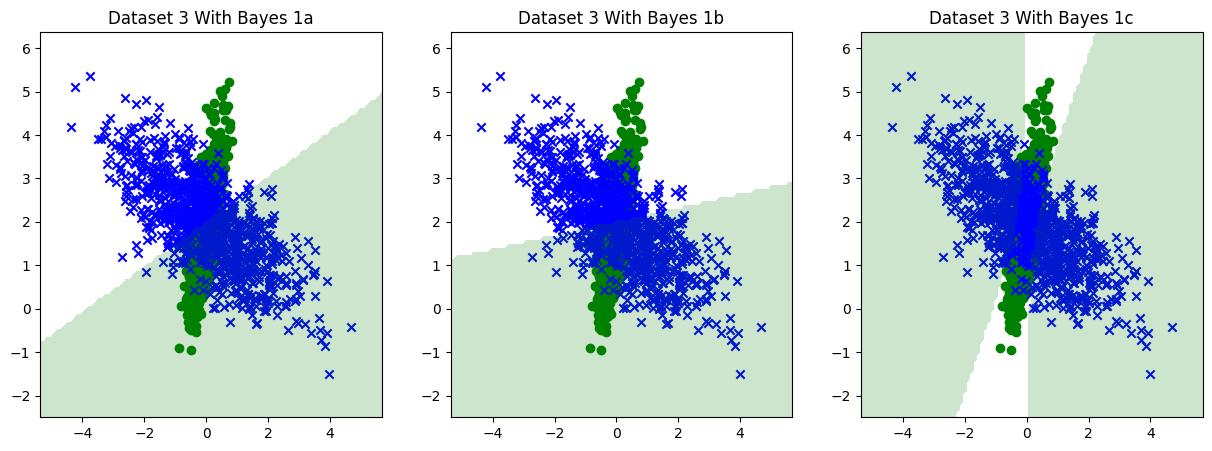

In [32]:
# Cell type : CodeWrite

def PdfMultivariateGaussian(X, mu, cov):
    assert(X.shape == mu.shape)
    assert(cov.shape[0] == cov.shape[1])

    twoPi = 2 * np.pi
    n = X.shape[0]
    detCov = np.linalg.det(cov)
    assert(detCov != 0)
    const = 1/(np.sqrt(twoPi**n * detCov))
    powerTerm = -0.5 * np.matmul(np.matmul((X-mu).T, np.linalg.inv(cov)), (X-mu))
    return const * np.exp(powerTerm)

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    X_train_pos = X_train[Y_train == 1]
    X_train_neg = X_train[Y_train == -1]

    pos_count = X_train_pos.shape[0]
    a = pos_count / X_train.shape[0]
    mu_pos = np.mean(X_train_pos, axis=0)
    mu_neg = np.mean(X_train_neg, axis=0)

    cov = np.eye(X_train.shape[1])

    Y_test_pred = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        p_pos = PdfMultivariateGaussian(X_test[i], mu_pos, cov)
        p_neg = PdfMultivariateGaussian(X_test[i], mu_neg, cov)
        if p_pos * a > p_neg * (1-a):
            Y_test_pred[i] = 1
        else:
            Y_test_pred[i] = -1

    return Y_test_pred
    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    X_train_pos = X_train[Y_train == 1]
    X_train_neg = X_train[Y_train == -1]

    pos_count = X_train_pos.shape[0]
    a = pos_count / X_train.shape[0]
    mu_pos = np.mean(X_train_pos, axis=0)
    mu_neg = np.mean(X_train_neg, axis=0)

    cov = np.zeros((X_train.shape[1], X_train.shape[1]))
    for i in range(X_train.shape[0]):
        temp1 = np.array([X_train[i] - mu_pos])
        temp2 = np.array([X_train[i] - mu_neg])
        if Y_train[i] == 1:
            cov += np.matmul(np.transpose(temp1), temp1)
        else:
            cov += np.matmul(np.transpose(temp2), temp2)

    cov /= X_train.shape[0]

    Y_test_pred = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        p_pos = PdfMultivariateGaussian(X_test[i], mu_pos, cov)
        p_neg = PdfMultivariateGaussian(X_test[i], mu_neg, cov)
        if p_pos * a > p_neg * (1-a):
            Y_test_pred[i] = 1
        else:
            Y_test_pred[i] = -1

    return Y_test_pred

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    X_train_pos = X_train[Y_train == 1]
    X_train_neg = X_train[Y_train == -1]

    pos_count = X_train_pos.shape[0]
    a = pos_count / X_train.shape[0]
    mu_pos = np.mean(X_train_pos, axis=0)
    mu_neg = np.mean(X_train_neg, axis=0)

    cov_pos = np.zeros((X_train.shape[1], X_train.shape[1]))
    cov_neg = np.zeros((X_train.shape[1], X_train.shape[1]))

    for i in range(X_train.shape[0]): 
        temp1 = np.array([X_train[i] - mu_pos])
        temp2 = np.array([X_train[i] - mu_neg])
    
        if Y_train[i] == 1:
            cov_pos += np.matmul(np.transpose(temp1), temp1)
        else:
            cov_neg += np.matmul(np.transpose(temp2), temp2)

    cov_pos /= pos_count
    cov_neg /= (X_train.shape[0] - pos_count)

    Y_test_pred = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        p_pos = PdfMultivariateGaussian(X_test[i], mu_pos, cov_pos)
        p_neg = PdfMultivariateGaussian(X_test[i], mu_neg, cov_neg)
        if p_pos * a > p_neg * (1-a):
            Y_test_pred[i] = 1
        else:
            Y_test_pred[i] = -1

    return Y_test_pred

markers = ['o', 'x']
colors = ['g', 'b']

for i in range(1, 4):
    plt.subplots(1, 3, figsize=(15, 5))
    filename = 'dataset1_' + str(i) + '.npz'
    data = np.load(filename)

    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    Y_test_pred1 = Bayes1a(X_train, Y_train, X_test)
    Y_test_pred2 = Bayes1b(X_train, Y_train, X_test)
    Y_test_pred3 = Bayes1c(X_train, Y_train, X_test)

    print("Dataset " + str(i))
    print("Error 1a: ", (Y_test.shape[0] - np.sum(Y_test_pred1 == Y_test))/Y_test.shape[0])
    print("Error 1b: ", (Y_test.shape[0] - np.sum(Y_test_pred2 == Y_test))/Y_test.shape[0])
    print("Error 1c: ", (Y_test.shape[0] - np.sum(Y_test_pred3 == Y_test))/Y_test.shape[0])

    max_X = np.max(X_train[:, 0])
    min_X = np.min(X_train[:, 0])
    max_Y = np.max(X_train[:, 1])
    min_Y = np.min(X_train[:, 1])
    size = 100
    X, Y = np.meshgrid(np.linspace(min_X-1, max_X+1, size), np.linspace(min_Y-1, max_Y+1, size))
    X_plotter = np.zeros((size**2, 2))
    for j in range(size):
        for k in range(size):
            X_plotter[j*size+k, 0] = X[j, k]
            X_plotter[j*size+k, 1] = Y[j, k]

    plt.subplot(1, 3, 1)
    plt.title("Dataset " + str(i) + " With Bayes 1a")
    for j in range(2):
        plt.scatter(X_train[Y_train == 2*j-1, 0], X_train[Y_train == 2*j-1, 1], marker=markers[j], c=colors[j])
    
    Z = Bayes1a(X_train, Y_train, X_plotter)
    Z = Z.reshape(size, size)
    plt.contourf(X, Y, Z, [0, 2], colors=['g', 'r'], alpha=0.2)

    plt.subplot(1, 3, 2)
    plt.title("Dataset " + str(i) + " With Bayes 1b")
    for j in range(2):
        plt.scatter(X_train[Y_train == 2*j-1, 0], X_train[Y_train == 2*j-1, 1], marker=markers[j], c=colors[j])

    Z = Bayes1b(X_train, Y_train, X_plotter)
    Z = Z.reshape(size, size)
    plt.contourf(X, Y, Z, [0, 2], colors=['g', 'r'], alpha=0.2)

    plt.subplot(1, 3, 3)
    plt.title("Dataset " + str(i) + " With Bayes 1c")
    for j in range(2):
        plt.scatter(X_train[Y_train == 2*j-1, 0], X_train[Y_train == 2*j-1, 1], marker=markers[j], c=colors[j])

    Z = Bayes1c(X_train, Y_train, X_plotter)
    Z = Z.reshape(size, size)
    plt.contourf(X, Y, Z, [0, 2], colors=['g', 'r'], alpha=0.2)
    plt.show()

In [5]:
a = [[1, 2], [2, 3]]
a = np.array(a)
b = np.array([[1, 2]])
np.dot(a, np.transpose(b))

array([[5],
       [8]])